In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
def get_coords(index):
    coords = pd.DataFrame(index=index)
    coords['x'] = index.str.split('x').str.get(0).map(float)
    coords['y'] = index.str.split('x').str.get(1).map(float)
    return coords

In [4]:
import fastgp as fgp

In [5]:
df = pd.read_csv('data/Rep11_MOB_0.csv', index_col=0)
sample_info = get_coords(df.index)

X = sample_info[['x', 'y']]
dfm = np.log10(df + 1)

ks = {
    'SE': np.logspace(-1., np.log10(40), 3),
    'const': 0
}
results = fgp.run(X, dfm, kernel_space=ks)

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.057s
INFO:root:Fitting gene models
100%|██████████| 16218/16218 [00:13<00:00, 1203.22it/s]
INFO:root:Simulating 10000 null models
INFO:root:Done: 1.2s
INFO:root:Performing DE test on null models
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.044s
INFO:root:Fitting gene models
100%|██████████| 10000/10000 [00:08<00:00, 1207.39it/s]
INFO:root:Done: 2.4e+01s
INFO:root:Fitting null distribution
INFO:root:Done: 7.5s


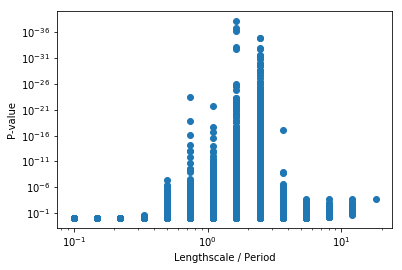

In [19]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

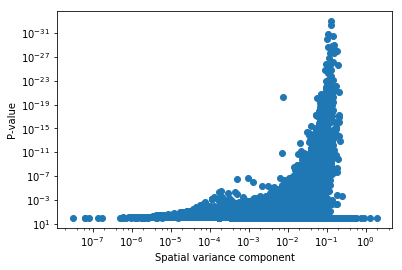

In [6]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

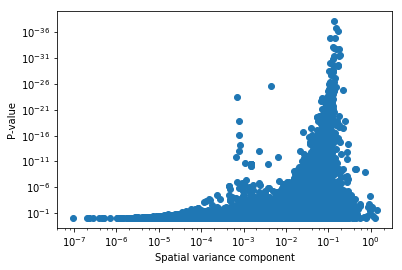

In [21]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

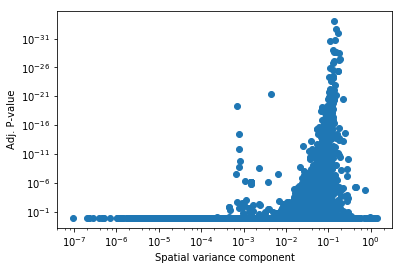

In [22]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

In [23]:
results.model.value_counts()

SE    16218
Name: model, dtype: int64

In [362]:
null_lls = results.query('model == "const"')[['g', 'max_ll']]

In [363]:
bic_results = results[results.groupby(['g'])['BIC'].transform(min) == results['BIC']]

In [364]:
final = bic_results.merge(null_lls, on='g',)

In [365]:
final['D'] = final['max_ll_x'] - final['max_ll_y']

In [366]:
final.head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
0,Nrf1,inf,54.831873,0.149479,0.0,262,0.0,NaN,2,const,-98.527058,54.831873,0.0
1,Zbtb5,inf,59.508318,0.154437,0.0,262,0.0,NaN,2,const,-107.879947,59.508318,0.0
2,Ccnl1,inf,-40.043457,0.405545,0.0,262,0.0,NaN,2,const,91.223602,-40.043457,0.0
3,Lrrfip1,inf,-47.165937,0.304243,0.0,262,0.0,NaN,2,const,105.468563,-47.165937,0.0
4,Bbs1,inf,-12.146133,0.296797,0.0,262,0.0,NaN,2,const,35.428956,-12.146133,0.0


In [367]:
final.model.value_counts()

const     12933
SE         2349
PER         769
linear      167
Name: model, dtype: int64

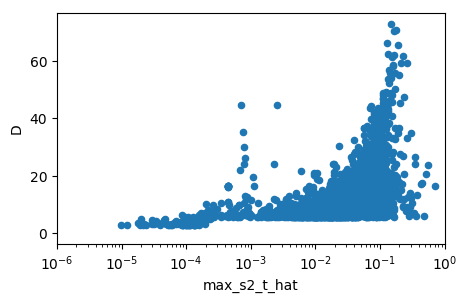

In [370]:
figsize(5, 3)
final.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-6, 1));

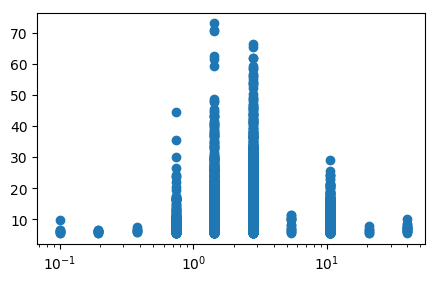

In [372]:
figsize(5, 3)
plt.scatter(final.l, final.D);
plt.xscale('log');
# plt.ylim(-10, 500);

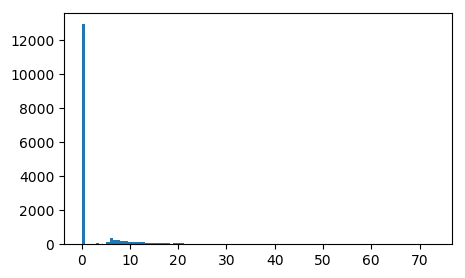

In [373]:
plt.hist(final.D, bins=100);

In [374]:
final.query('D > 10').sort_values('D', ascending=False).head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
13621,Tubb2b,0.596142,-33.614712,0.867599,0.146230,262,0.000595,1.433742,4,SE,89.502801,-106.610323,72.995611
14004,Nrgn,0.570634,-75.756380,0.879298,0.180331,262,0.000659,1.433742,4,SE,173.786138,-146.527481,70.771101
13422,Penk,0.659741,-40.339015,1.005200,0.167977,262,0.000522,1.433742,4,SE,102.951407,-110.706643,70.367629
14830,Psd,0.562445,-46.116140,0.722942,0.129687,262,0.000589,2.789902,4,SE,114.505657,-112.320027,66.203887
14420,Kcnh3,0.408504,-72.207118,0.457981,0.187833,262,0.000628,2.789902,4,SE,166.687614,-137.576378,65.369260


In [375]:
final.query('D > 10').model.value_counts()

SE        1452
PER        204
linear       2
Name: model, dtype: int64

In [377]:
final.query('D > 10 & model == "PER"').head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
15490,Arhgdig,17.112322,-46.195171,0.340921,0.011100,262,0.002922,5.428835,4,PER,114.663721,-57.650641,11.455470
15491,Reln,18.418947,-73.532767,0.897576,0.047892,262,0.002900,5.428835,4,PER,169.338912,-84.943839,11.411072
15494,Trnp1,18.128299,-21.443679,0.930849,0.050221,262,0.001581,5.428835,4,PER,65.160737,-32.025905,10.582225
15495,Gabra1,18.931458,-30.128866,1.163780,0.073547,262,0.001494,5.428835,4,PER,82.531110,-40.514412,10.385546
15499,Otop2,17.082738,-16.088108,0.222286,0.006380,262,0.001619,5.428835,4,PER,54.449594,-26.285348,10.197240


In [378]:
df = pd.read_csv('data/Rep11_MOB_0.csv', index_col=0)
sample_info = get_coords(df.index)

In [379]:
dfm = np.log10(df + 1)

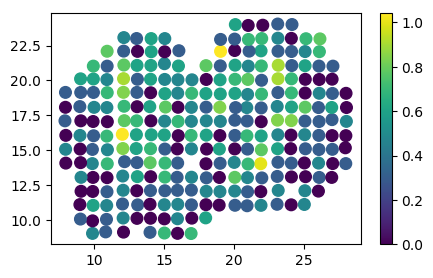

In [380]:
plt.scatter(sample_info.x, sample_info.y, c=dfm['Hnrpll'], s=70);
plt.colorbar();

In [381]:
final.query('D > 10 & model == "linear"')

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
12983,Hlf,256.969343,-36.081497,0.613543,0.000352,262,0.001223,NaN,3,linear,88.868027,-46.521202,10.439705
13063,Cby1,344.787950,-18.468897,0.340006,0.000203,262,0.001152,NaN,3,linear,53.642827,-28.685240,10.216343


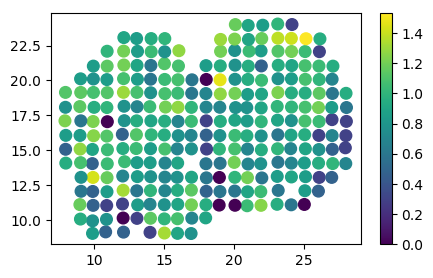

In [382]:
plt.scatter(sample_info.x, sample_info.y, c=dfm['Hlf'], s=70);
plt.colorbar();

In [383]:
final.query('D > 10').sort_values('D', ascending=False).head(30)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
13621,Tubb2b,0.596142,-33.614712,0.867599,0.146230,262,0.000595,1.433742,4,SE,89.502801,-106.610323,72.995611
14004,Nrgn,0.570634,-75.756380,0.879298,0.180331,262,0.000659,1.433742,4,SE,173.786138,-146.527481,70.771101
13422,Penk,0.659741,-40.339015,1.005200,0.167977,262,0.000522,1.433742,4,SE,102.951407,-110.706643,70.367629
14830,Psd,0.562445,-46.116140,0.722942,0.129687,262,0.000589,2.789902,4,SE,114.505657,-112.320027,66.203887
14420,Kcnh3,0.408504,-72.207118,0.457981,0.187833,262,0.000628,2.789902,4,SE,166.687614,-137.576378,65.369260
13463,Baiap2,0.749889,-82.580990,0.674517,0.134208,262,0.000571,1.433742,4,SE,187.435357,-145.121824,62.540835
14609,Camk2a,0.407867,-47.869622,0.614180,0.163348,262,0.000657,2.789902,4,SE,118.012623,-109.765619,61.895996
14738,Ncdn,0.457095,-105.251623,0.764937,0.230928,262,0.000770,2.789902,4,SE,232.776623,-167.038197,61.786574
13389,Gng4,0.829171,-107.501107,0.760067,0.156162,262,0.000525,1.433742,4,SE,237.275592,-168.886794,61.385687
14559,Gpsm1,0.546783,-116.514286,0.710811,0.213375,262,0.000519,2.789902,4,SE,255.301949,-175.890578,59.376292


In [404]:
top_per_ls = final.query('D > 20').sort_values('D', ascending=False).groupby('l').head(5).sort_values(['l', 'D'], ascending=[True, False])
top_per_ls

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
13274,Siglec1,0.000045,626.554640,0.003053,0.000714,262,0.000390,0.736806,4,SE,-1230.835903,581.934719,44.619921
13314,Il12a,0.000283,617.373738,0.002578,0.000765,262,0.000754,0.736806,4,SE,-1212.474097,581.934719,35.439019
13316,Obp2b,0.001183,612.063825,0.002408,0.000795,262,0.000528,0.736806,4,SE,-1201.854273,581.934719,30.129106
13321,Pkmyt1,0.002072,608.295108,0.002210,0.000816,262,0.000730,0.736806,4,SE,-1194.316838,581.934719,26.360389
13299,Cacng1,0.021858,606.081088,0.002215,0.000796,262,0.000985,0.736806,4,SE,-1189.888798,581.934719,24.146369
13621,Tubb2b,0.596142,-33.614712,0.867599,0.146230,262,0.000595,1.433742,4,SE,89.502801,-106.610323,72.995611
14004,Nrgn,0.570634,-75.756380,0.879298,0.180331,262,0.000659,1.433742,4,SE,173.786138,-146.527481,70.771101
13422,Penk,0.659741,-40.339015,1.005200,0.167977,262,0.000522,1.433742,4,SE,102.951407,-110.706643,70.367629
13463,Baiap2,0.749889,-82.580990,0.674517,0.134208,262,0.000571,1.433742,4,SE,187.435357,-145.121824,62.540835
13389,Gng4,0.829171,-107.501107,0.760067,0.156162,262,0.000525,1.433742,4,SE,237.275592,-168.886794,61.385687


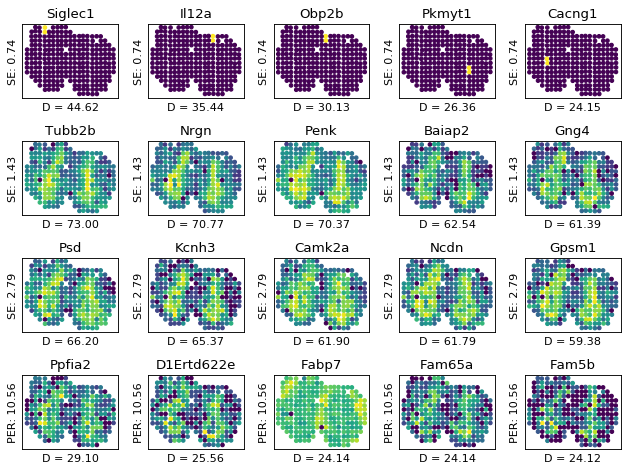

In [405]:
plt.figure(figsize=(8, 6), dpi=80)

N = 5
for i, idx in enumerate(tmp.index):
    r = top_per_ls.loc[idx]
    plt.subplot(np.ceil(top_per_ls.shape[0] / 5), 5, i + 1)
    plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=10);
    plt.title(r['g'])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('D = {:.2f}'.format(r['D']))
#     if (i + 1) % 5 == 1:
    if True:
        plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))
    
plt.tight_layout()
plt.savefig('top_MOB_genes_per_ls.pdf')

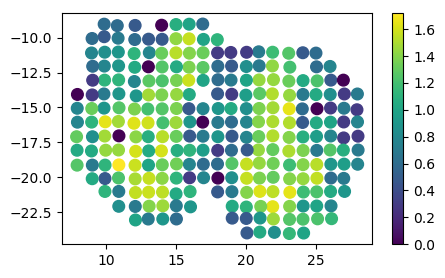

In [447]:
plt.scatter(sample_info.x, -sample_info.y, c=dfm['Nrxn3'], s=70);
plt.colorbar();

In [412]:
from adjustText import adjust_text

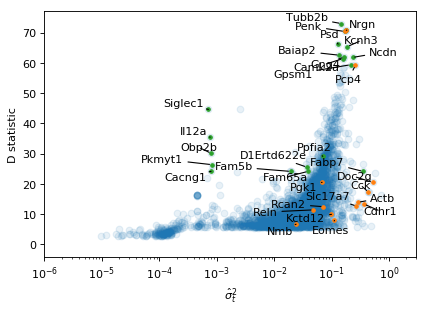

In [454]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.scatter(final['max_s2_t_hat'], final['D'], alpha=0.1, rasterized=True);
plt.gca().set_xlim(1e-6, 3e0);

tmp = final.query('g in ["Penk", "Doc2g", "Kctd12",' \
                        '"Actb", "Pgk1",' \
                        '"Nrsn1", "Cck",' \
                        '"Pcp4", "Nrgn",' \
                        '"Eomes", "Calb2",' \
                        '"Doc2g", "Slc17a7", "Reln", "Cdhr1", "Sv2b", "Shisa3"' \
                        '"Plcxd2", "Nmb", "Uchl1", "Rcan2"]')

plt.scatter(tmp['max_s2_t_hat'], tmp['D'], s=10, zorder=10);
texts = []
for i in tmp.index.union(top_per_ls.index):
    if final.loc[i, 'max_s2_t_hat'] == 0.:
        continue

    texts.append(plt.text(final.loc[i, 'max_s2_t_hat'], final.loc[i, 'D'], final.loc[i, 'g']))

adjust_text(texts, arrowprops=dict(arrowstyle='-'), force_text=0.1, zorder=20)

plt.scatter(top_per_ls['max_s2_t_hat'], top_per_ls['D'], s=10);    

plt.xlabel('$\hat{\sigma}^2_t$');
plt.ylabel('D statistic');

plt.savefig('sigma_D_MOB.pdf', bbox_inches='tight');

In [455]:
final.sort_values('D', ascending=False).query('D > 50').head(20)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
13621,Tubb2b,0.596142,-33.614712,0.867599,0.146230,262,0.000595,1.433742,4,SE,89.502801,-106.610323,72.995611
14004,Nrgn,0.570634,-75.756380,0.879298,0.180331,262,0.000659,1.433742,4,SE,173.786138,-146.527481,70.771101
13422,Penk,0.659741,-40.339015,1.005200,0.167977,262,0.000522,1.433742,4,SE,102.951407,-110.706643,70.367629
14830,Psd,0.562445,-46.116140,0.722942,0.129687,262,0.000589,2.789902,4,SE,114.505657,-112.320027,66.203887
14420,Kcnh3,0.408504,-72.207118,0.457981,0.187833,262,0.000628,2.789902,4,SE,166.687614,-137.576378,65.369260
13463,Baiap2,0.749889,-82.580990,0.674517,0.134208,262,0.000571,1.433742,4,SE,187.435357,-145.121824,62.540835
14609,Camk2a,0.407867,-47.869622,0.614180,0.163348,262,0.000657,2.789902,4,SE,118.012623,-109.765619,61.895996
14738,Ncdn,0.457095,-105.251623,0.764937,0.230928,262,0.000770,2.789902,4,SE,232.776623,-167.038197,61.786574
13389,Gng4,0.829171,-107.501107,0.760067,0.156162,262,0.000525,1.433742,4,SE,237.275592,-168.886794,61.385687
14559,Gpsm1,0.546783,-116.514286,0.710811,0.213375,262,0.000519,2.789902,4,SE,255.301949,-175.890578,59.376292


In [418]:
i

1619

In [144]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import Isomap

In [194]:
pca = PCA(2)

In [195]:
np.linspace(5, 50, )

array([  5.        ,   5.91836735,   6.83673469,   7.75510204,
         8.67346939,   9.59183673,  10.51020408,  11.42857143,
        12.34693878,  13.26530612,  14.18367347,  15.10204082,
        16.02040816,  16.93877551,  17.85714286,  18.7755102 ,
        19.69387755,  20.6122449 ,  21.53061224,  22.44897959,
        23.36734694,  24.28571429,  25.20408163,  26.12244898,
        27.04081633,  27.95918367,  28.87755102,  29.79591837,
        30.71428571,  31.63265306,  32.55102041,  33.46938776,
        34.3877551 ,  35.30612245,  36.2244898 ,  37.14285714,
        38.06122449,  38.97959184,  39.89795918,  40.81632653,
        41.73469388,  42.65306122,  43.57142857,  44.48979592,
        45.40816327,  46.32653061,  47.24489796,  48.16326531,
        49.08163265,  50.        ])

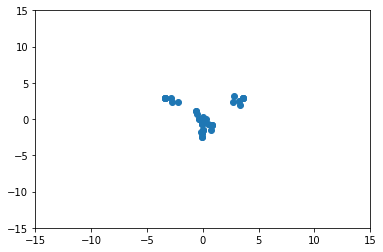

In [193]:
for i, D_thresh in enumerate(np.linspace(5, 50, 30)):
    plt.clf()
    Y = pca.fit_transform(scale(dfm[final.query('D > {}'.format(D_thresh))['g'].index], 1))
    plt.scatter(Y[:, 0], Y[:, 1]);
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.savefig('anim/frame{0:03d}.png'.format(i))

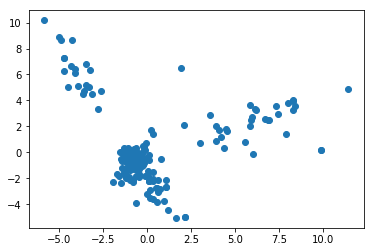

In [196]:
D_thresh = 30
Y = pca.fit_transform(scale(dfm[final.query('D > {}'.format(D_thresh))['g'].index], 1))
plt.scatter(Y[:, 0], Y[:, 1]);

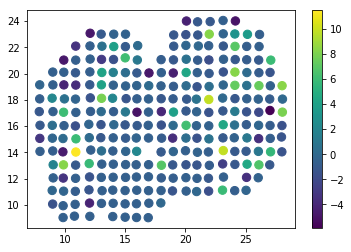

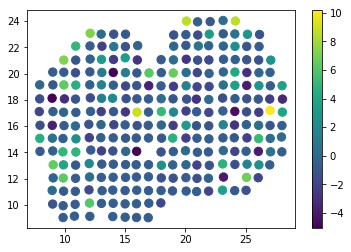

In [197]:
plt.scatter(sample_info.x, sample_info.y, c=Y[:,0], s=70);
plt.colorbar();

plt.figure()
plt.scatter(sample_info.x, sample_info.y, c=Y[:,1], s=70);
plt.colorbar();

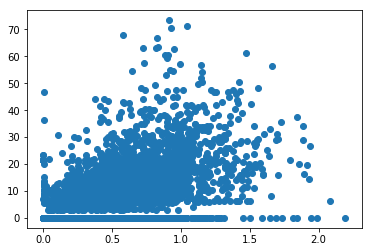

In [220]:
plt.scatter(dfm[final['g']].mean(), final['D']);

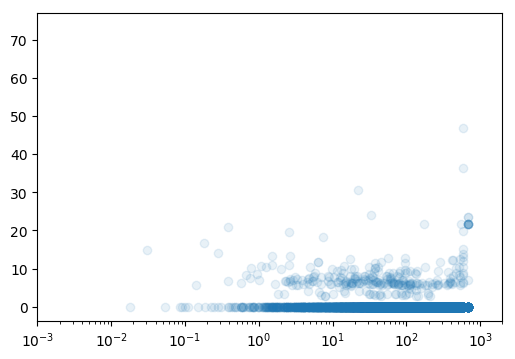

In [332]:
plt.xscale('log')
plt.scatter(final['max_ll_y'], final['D'], alpha=0.1);
plt.gca().set_xlim(1e-3, 2e3);

In [333]:
import seaborn as sns
sns.set_context('paper')
matplotlib.style.use('default')

In [457]:
sample_info.to_csv('MOB_sample_info.csv')
final.to_csv('MOB_final_results.csv')